In [105]:
# Import statements
import numpy as np
import pandas as pd
import sqlite3

In [106]:
# Connecting to sqlite 
conn = sqlite3.connect('pudl_subset.sqlite')

# Creating a cursor object using the cursor() method 
cursor = conn.cursor()

In [107]:
# Show all tables in database
tables_query = """SELECT name FROM sqlite_master  
                  WHERE type='table';"""
cursor.execute(tables_query)
table_list = cursor.fetchall()
print(table_list)

[('yearly_plant_generation',), ('monthly_generation_grouped',)]


### Database columns explained
Descriptions from: https://data.catalyst.coop/pudl/out_ferc1__yearly_all_plants

- report_year: "Four-digit year in which the data was reported."
- utility_id_ferc1: "PUDL-assigned utility ID, identifying a FERC1 utility. This is an auto- incremented ID and is not expected to be stable from year to year."
- utility_id_pudl: "A manually assigned PUDL utility ID. May not be stable over time."
- utility_name_ferc1: "Name of the responding utility, as it is reported in FERC Form 1. For human readability only."
- plant_id_pudl: "A manually assigned PUDL plant ID. May not be constant over time."
- plant_id_ferc1: "Algorithmically assigned PUDL FERC Plant ID. WARNING: NOT STABLE BETWEEN PUDL DB INITIALIZATIONS."
- plant_name_ferc1: "Name of the plant, as reported to FERC. This is a freeform string, not guaranteed to be consistent across references to the same plant."
- net_generation_mwh: "Net electricity generation for the specified period in megawatt-hours (MWh)."
- fuel_cost_per_mwh: "Derived from MCOE, a unit level value. Average fuel cost per MWh of heat content in nominal USD."
- plant_type: "Type of plant."
- fuel_type: "Type of fuel."
- net_load_mwh: "Net output for load (net generation - energy used for pumping) in megawatt- hours."

### Import database into Pandas dataframe
There is currently only one table in the database. This is how you import it into Pandas.

In [108]:
pudl_yearly_df = pd.read_sql_query("SELECT * FROM yearly_plant_generation", conn)

In [109]:
# Filter the dataframe for entries with zip codes that start with 20, 21, 22, or 23
filtered_zip_df = pudl_yearly_df[pudl_yearly_df['zip_code'].astype(str).str.startswith(('20', '21', '22', '23'))]

# Display the filtered dataframe
filtered_zip_df

,report_year,utility_id_ferc1,utility_id_pudl_x,utility_name_ferc1,plant_id_pudl,plant_id_ferc1,plant_name_ferc1,net_generation_mwh,fuel_cost_per_mwh,plant_type,...,city,county,latitude,longitude,state,street_address,zip_code,utility_id_eia,utility_name_eia,utility_id_pudl_y
1534,2011,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,2.235231e+06,33.707893,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1535,2012,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,4.053230e+06,26.014851,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1536,2013,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,3.732706e+06,33.751797,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1537,2014,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,3.170118e+06,50.353065,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1538,2015,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,3.461422e+06,32.774944,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78688,2022,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.135089e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,58468.0,Dominion Renewable Energy,1498.0
78689,2022,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.135089e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,64711.0,fort powhatan solar,13981.0
78690,2023,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.128501e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,58468.0,Dominion Renewable Energy,1498.0
78691,2023,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.128501e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,64711.0,fort powhatan solar,13981.0


### Import monthly data into Pandas from database
This is likely the data we will use the most

In [110]:
# Function to get the schema of a table
def get_table_schema(table_name):
    schema_query = f"PRAGMA table_info({table_name});"
    cursor.execute(schema_query)
    schema = cursor.fetchall()
    return schema

# Get schema for each table
for table in table_list:
    table_name = table[0]
    schema = get_table_schema(table_name)
    print(f"Schema for table {table_name}:")
    for column in schema:
        print(f"  {column[1]} ({column[2]})")
    print("\n")

Schema for table yearly_plant_generation:
  report_year (BIGINT)
  utility_id_ferc1 (BIGINT)
  utility_id_pudl_x (BIGINT)
  utility_name_ferc1 (TEXT)
  plant_id_pudl (BIGINT)
  plant_id_ferc1 (FLOAT)
  plant_name_ferc1 (TEXT)
  net_generation_mwh (FLOAT)
  fuel_cost_per_mwh (FLOAT)
  plant_type (TEXT)
  fuel_type (TEXT)
  net_load_mwh (FLOAT)
  plant_id_eia (FLOAT)
  plant_name_eia (TEXT)
  city (TEXT)
  county (TEXT)
  latitude (FLOAT)
  longitude (FLOAT)
  state (TEXT)
  street_address (TEXT)
  zip_code (TEXT)
  utility_id_eia (FLOAT)
  utility_name_eia (TEXT)
  utility_id_pudl_y (FLOAT)


Schema for table monthly_generation_grouped:
  report_date (TEXT)
  state (TEXT)
  SUM(net_generation_mwh) (FLOAT)




In [111]:
import os
import pandas as pd

# Define the folder path
folder_path = 'data_center_locations'

# Initialize an empty list to store dataframes
dataframes = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
all_locations_df = pd.concat(dataframes, ignore_index=True)

# Display the combined dataframe
all_locations_df.head()

,Continent,Location,Country,Latitude,Longitude,Year Established
0,Asia,Hangzhou,China,30.2741,120.1551,-
1,Asia,Beijing,China,39.9042,116.4074,-
2,Asia,Shanghai,China,31.2304,121.4737,-
3,Asia,Shenzhen,China,22.5431,114.0579,-
4,Asia,Hong Kong,Hong Kong,22.3193,114.1694,-


In [112]:
# Filter the DataFrame to include only North American values
north_america_df = all_locations_df[all_locations_df['Continent'] == 'North America']

# Display the filtered DataFrame
north_america_df.tail(10)

,Continent,Location,Country,Latitude,Longitude,Year Established
76,North America,"Henrico County, Virginia",United States,37.5129,-77.32,2020
77,North America,"Boydton, Virginia",United States,36.6534,-78.3717,2010
78,North America,"Des Moines, Iowa",United States,41.6342,-93.6443,2015
79,North America,"Quincy, Washington",United States,47.3769,-119.6389,2007
80,North America,"San Antonio, Texas",United States,29.4997,-98.3992,2008
81,North America,"Cheyenne, Wyoming",United States,41.14,-104.8202,2013
82,North America,"Chicago, Illinois",United States,41.8819,-87.6278,2015
90,North America,"Ashburn, Virginia",United States,39.0215,-77.4579,-
91,North America,"Phoenix, Arizona",United States,33.4484,-112.074,-
92,North America,"Toronto, Ontario",Canada,43.651,-79.347,-


In [113]:
import requests

response = requests.get("http://api.zippopotam.us/us/90210")
data = response.json()
print(data)

{'post code': '90210', 'country': 'United States', 'country abbreviation': 'US', 'places': [{'place name': 'Beverly Hills', 'longitude': '-118.4065', 'state': 'California', 'state abbreviation': 'CA', 'latitude': '34.0901'}]}


In [114]:
response = requests.get("http://api.zippopotam.us/us/az/phoenix")
data = response.json()
print(data)
# Extract all zip codes associated with Phoenix
phoenix_zip_codes = [place['post code'] for place in data['places']]
print(phoenix_zip_codes)

{'country abbreviation': 'US', 'places': [{'place name': 'Phoenix', 'longitude': '-112.3518', 'post code': '85001', 'latitude': '33.704'}, {'place name': 'Phoenix', 'longitude': '-112.1872', 'post code': '85002', 'latitude': '33.2765'}, {'place name': 'Phoenix', 'longitude': '-112.0774', 'post code': '85003', 'latitude': '33.4511'}, {'place name': 'Phoenix', 'longitude': '-112.0686', 'post code': '85004', 'latitude': '33.4557'}, {'place name': 'Phoenix', 'longitude': '-112.1872', 'post code': '85005', 'latitude': '33.2765'}, {'place name': 'Phoenix', 'longitude': '-112.0474', 'post code': '85006', 'latitude': '33.465'}, {'place name': 'Phoenix', 'longitude': '-112.0893', 'post code': '85007', 'latitude': '33.4523'}, {'place name': 'Phoenix', 'longitude': '-111.9984', 'post code': '85008', 'latitude': '33.4665'}, {'place name': 'Phoenix', 'longitude': '-112.1284', 'post code': '85009', 'latitude': '33.4564'}, {'place name': 'Phoenix', 'longitude': '-112.1872', 'post code': '85010', 'lat

In [115]:
# Filter out entries not in the United States
north_america_df = north_america_df[north_america_df['Country'] == 'United States']

# Update the Location column to be in the format "State/Town"
def format_location(row):
	if ',' in row['Location']:
		parts = row['Location'].split(', ')
		return f"{parts[1]}/{parts[0]}"
	return row['Location']

north_america_df['Location'] = north_america_df.apply(format_location, axis=1)

# Display the updated DataFrame
# north_america_df

In [116]:
# Dictionary to map full state names to their abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Function to replace full state names with abbreviations in the Location column
def replace_state_names(location):
    for state, abbreviation in state_abbreviations.items():
        if state in location:
            return location.replace(state, abbreviation)
    return location

# Apply the function to the Location column
north_america_df['Location'] = north_america_df['Location'].apply(replace_state_names)

# Display the updated DataFrame
# north_america_df

In [117]:
import requests

# Function to get zip codes for a given location
def get_zip_codes(location):
    try:
        response = requests.get(f"http://api.zippopotam.us/us/{location}")
        if response.status_code == 200:
            data = response.json()
            zip_codes = [place['post code'] for place in data['places']]
            return ', '.join(zip_codes)
        else:
            return None
    except Exception as e:
        print(f"Error fetching zip codes for {location}: {e}")
        return None

# Update the 'Zip Codes' column for each entry in the DataFrame
north_america_df['Zip Codes'] = north_america_df['Location'].apply(get_zip_codes)

# Display the updated DataFrame
north_america_df.tail(8)

,Continent,Location,Country,Latitude,Longitude,Year Established,Zip Codes
77,North America,VA/Boydton,United States,36.6534,-78.3717,2010,23917
78,North America,IA/Des Moines,United States,41.6342,-93.6443,2015,"50265, 50266, 50301, 50302, 50303, 50304, 5030..."
79,North America,WA/Quincy,United States,47.3769,-119.6389,2007,98848
80,North America,TX/San Antonio,United States,29.4997,-98.3992,2008,"78201, 78202, 78203, 78204, 78205, 78206, 7820..."
81,North America,WY/Cheyenne,United States,41.14,-104.8202,2013,"82001, 82002, 82003, 82006, 82007, 82008, 8200..."
82,North America,IL/Chicago,United States,41.8819,-87.6278,2015,"60064, 60086, 60185, 60186, 60290, 60411, 6041..."
90,North America,VA/Ashburn,United States,39.0215,-77.4579,-,"20146, 20147, 20148, 20149, 22011, 22093"
91,North America,AZ/Phoenix,United States,33.4484,-112.074,-,"85001, 85002, 85003, 85004, 85005, 85006, 8500..."


In [118]:
# Extract all zip codes from the 'Zip Codes' column and create a list of unique zip codes
data_center_zipcodes = north_america_df['Zip Codes'].dropna().str.split(', ').explode().unique().tolist()

# Display the list of data center zip codes
print(data_center_zipcodes)

['20146', '20147', '20148', '20149', '22011', '22093', '97818', '43016', '43017', '28650', '94560', '60064', '60086', '60185', '60186', '60290', '60411', '60412', '60415', '60601', '60602', '60603', '60604', '60605', '60606', '60607', '60608', '60609', '60610', '60611', '60612', '60613', '60614', '60615', '60616', '60617', '60618', '60619', '60620', '60621', '60622', '60623', '60624', '60625', '60626', '60628', '60629', '60630', '60631', '60632', '60633', '60634', '60636', '60637', '60638', '60639', '60640', '60641', '60642', '60643', '60644', '60645', '60646', '60647', '60648', '60649', '60651', '60652', '60653', '60654', '60655', '60656', '60657', '60658', '60659', '60660', '60661', '60663', '60664', '60665', '60667', '60668', '60669', '60670', '60671', '60672', '60673', '60674', '60675', '60677', '60678', '60680', '60681', '60682', '60683', '60684', '60685', '60686', '60687', '60688', '60689', '60690', '60691', '60693', '60694', '60695', '60696', '60697', '60699', '60701', '60799', 

In [119]:
# Convert the list of data center zip codes to a tuple for use in SQL query
zip_codes_tuple = tuple(data_center_zipcodes)

# Create a SQL query to filter the entries
query = f"""
SELECT *
FROM yearly_plant_generation
WHERE zip_code IN {zip_codes_tuple}
"""

# Execute the query and store the result in a DataFrame
filtered_entries_df = pd.read_sql_query(query, conn)

# Sort the filtered DataFrame by 'report_year'
filtered_entries_df = filtered_entries_df.sort_values(by='report_year')

# Display the sorted DataFrame
filtered_entries_df.head()

# Filter the DataFrame to include only entries after 2015
filtered_entries_after_2015_df = filtered_entries_df[filtered_entries_df['report_year'] > 2015]

# Display the filtered DataFrame
filtered_entries_after_2015_df.head()

,report_year,utility_id_ferc1,utility_id_pudl_x,utility_name_ferc1,plant_id_pudl,plant_id_ferc1,plant_name_ferc1,net_generation_mwh,fuel_cost_per_mwh,plant_type,...,city,county,latitude,longitude,state,street_address,zip_code,utility_id_eia,utility_name_eia,utility_id_pudl_y
315,2016,286,31,Arizona Public Service Company,437,153.0,palo verde 2,3403812.500,8.420292,nuclear,...,Wintersburg,Maricopa,33.388100,-112.861702,AZ,Wintersburg Road,85036,803.0,Arizona Public Service Co,31.0
293,2016,263,274,Public Service Company of New Mexico,437,2809.0,palo verde (1),3291008.000,7.395033,nuclear,...,Wintersburg,Maricopa,33.388100,-112.861702,AZ,Wintersburg Road,85036,803.0,Arizona Public Service Co,31.0
97,2016,289,62,"Cheyenne Light, Fuel and Power Company",112,708.0,cheyenne prairie 42%,67705.000,23.891603,combined_cycle,...,Cheyenne,Laramie,41.123611,-104.720001,WY,6711 HR Ranch Road,82007,56771.0,Black Hills Service Company LLC,636.0
367,2016,286,31,Arizona Public Service Company,437,NaN,palo verde emergengy ops center,0.067,NaN,photovoltaic,...,Wintersburg,Maricopa,33.388100,-112.861702,AZ,Wintersburg Road,85036,803.0,Arizona Public Service Co,31.0
663,2016,263,274,Public Service Company of New Mexico,764,NaN,manzano solar,NaN,NaN,None,...,Los Lunas,Valencia,34.746666,-106.654404,NM,100 Bonita Vista,87031,59300.0,PNM Resources,2869.0


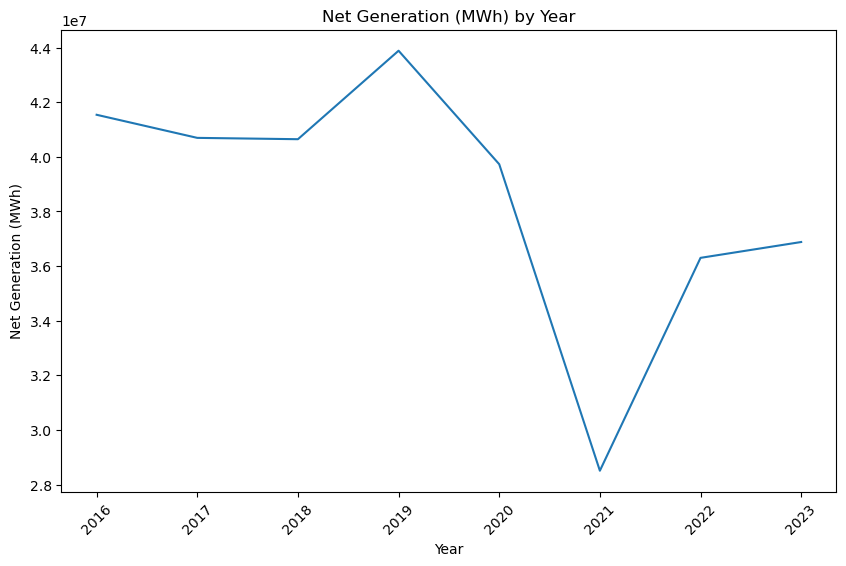

In [120]:
import matplotlib.pyplot as plt

# Group the data by report_year and sum the net_generation_mwh
generation_by_year = filtered_entries_after_2015_df.groupby('report_year')['net_generation_mwh'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
generation_by_year.plot()

plt.title('Net Generation (MWh) by Year')
plt.xlabel('Year')
plt.ylabel('Net Generation (MWh)')
plt.xticks(rotation=45)
plt.show()

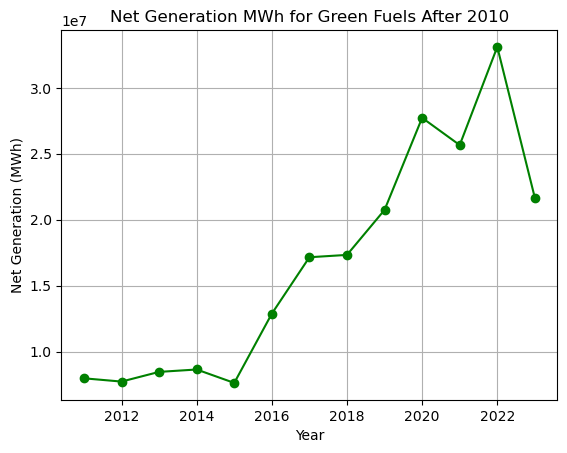

In [121]:
import matplotlib.pyplot as plt

green_fuels = ['hydro', 'wind', 'solar', 'nuclear']
green_fuel_df = pudl_yearly_df[pudl_yearly_df['fuel_type'].isin(green_fuels)]

# Filter the dataframe for entries after 2015
filtered_green_fuel_df = green_fuel_df[green_fuel_df['report_year'] > 2010]

# Group by report_year and sum the net_generation_mwh for each year
grouped_green_fuel_df = filtered_green_fuel_df.groupby('report_year')['net_generation_mwh'].sum().reset_index()

# Plot the data
plt.plot(grouped_green_fuel_df['report_year'], grouped_green_fuel_df['net_generation_mwh'], marker='o', linestyle='-', color='g')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Net Generation (MWh)')
plt.title('Net Generation MWh for Green Fuels After 2010')
plt.grid(True)

plt.show()

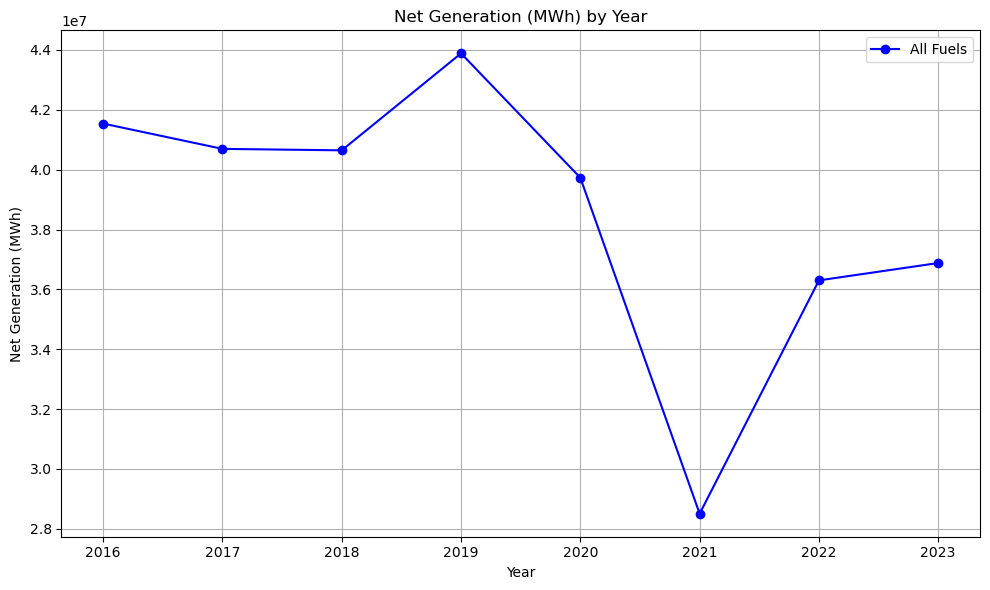

In [122]:
import matplotlib.pyplot as plt

# Group the data by report_year and sum the net_generation_mwh for filtered_entries_after_2015_df
generation_by_year = filtered_entries_after_2015_df.groupby('report_year')['net_generation_mwh'].sum()

# Create a figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the dataset
ax1.plot(generation_by_year.index, generation_by_year.values, marker='o', linestyle='-', color='b', label='All Fuels')
ax1.set_title('Net Generation (MWh) by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Generation (MWh)')
ax1.legend()
ax1.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [123]:
filtered_entries_after_2015_df.head()

,report_year,utility_id_ferc1,utility_id_pudl_x,utility_name_ferc1,plant_id_pudl,plant_id_ferc1,plant_name_ferc1,net_generation_mwh,fuel_cost_per_mwh,plant_type,...,city,county,latitude,longitude,state,street_address,zip_code,utility_id_eia,utility_name_eia,utility_id_pudl_y
315,2016,286,31,Arizona Public Service Company,437,153.0,palo verde 2,3403812.500,8.420292,nuclear,...,Wintersburg,Maricopa,33.388100,-112.861702,AZ,Wintersburg Road,85036,803.0,Arizona Public Service Co,31.0
293,2016,263,274,Public Service Company of New Mexico,437,2809.0,palo verde (1),3291008.000,7.395033,nuclear,...,Wintersburg,Maricopa,33.388100,-112.861702,AZ,Wintersburg Road,85036,803.0,Arizona Public Service Co,31.0
97,2016,289,62,"Cheyenne Light, Fuel and Power Company",112,708.0,cheyenne prairie 42%,67705.000,23.891603,combined_cycle,...,Cheyenne,Laramie,41.123611,-104.720001,WY,6711 HR Ranch Road,82007,56771.0,Black Hills Service Company LLC,636.0
367,2016,286,31,Arizona Public Service Company,437,NaN,palo verde emergengy ops center,0.067,NaN,photovoltaic,...,Wintersburg,Maricopa,33.388100,-112.861702,AZ,Wintersburg Road,85036,803.0,Arizona Public Service Co,31.0
663,2016,263,274,Public Service Company of New Mexico,764,NaN,manzano solar,NaN,NaN,None,...,Los Lunas,Valencia,34.746666,-106.654404,NM,100 Bonita Vista,87031,59300.0,PNM Resources,2869.0


In [124]:
# Replace 'combustion_turbine' and 'combined_cycle' with 'natural_gas' in the plant_type column
filtered_entries_after_2015_df['plant_type'] = filtered_entries_after_2015_df['plant_type'].replace(['combustion_turbine', 'combined_cycle'], 'natural_gas')

filtered_entries_after_2015_df['plant_type'] = filtered_entries_after_2015_df['plant_type'].replace(['internal combustion','steam'], 'oil/gas')

C:\Users\noaha\AppData\Local\Temp\ipykernel_16544\790744727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_entries_after_2015_df['plant_type'] = filtered_entries_after_2015_df['plant_type'].replace(['combustion_turbine', 'combined_cycle'], 'natural_gas')
C:\Users\noaha\AppData\Local\Temp\ipykernel_16544\790744727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_entries_after_2015_df['plant_type'] = filtered_entries_after_2015_df['plant_type'].replace(['internal combustion','steam']

In [125]:
unique_plant_types = filtered_entries_after_2015_df['plant_type'].unique()
print(unique_plant_types)

['nuclear' 'natural_gas' 'photovoltaic' None 'internal_combustion'
 'oil/gas']


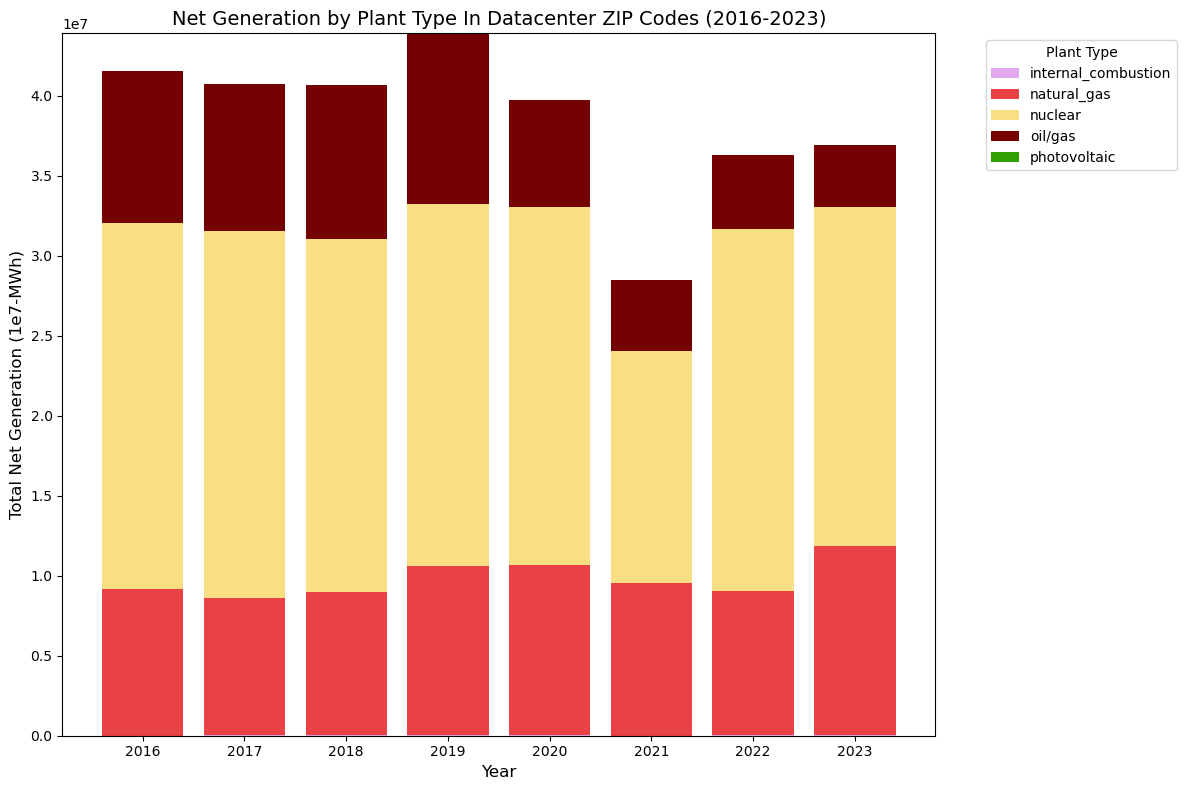

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure required columns exist in the DataFrame
filtered_entries_after_2015_df = filtered_entries_after_2015_df[['report_year', 'net_generation_mwh', 'plant_type']]

# Group by 'report_year' and 'plant_type', summing the 'net_generation_mwh' for each group
plant_type_generation = (
    filtered_entries_after_2015_df.groupby(['report_year', 'plant_type'])['net_generation_mwh']
    .sum()
    .unstack(fill_value=0)  # Fill missing plant types with 0
)

# Prepare data for stacking
years = plant_type_generation.index
types = plant_type_generation.columns
values = plant_type_generation.values


# Define a custom aesthetic color map
color_map = {
    'nuclear': '#F8DF83',        # Soft red for nuclear
    'natural_gas': '#E94244',    # Soft yellow for natural gas
    'hydro': '#423EA4',          # Soft blue for hydro
    'wind': '#C8D7EA',           # Soft white/gray for wind
    'steam': '#524743',          # Soft gray for steam
    'other': '#A5D890',          # Light gray for "other"
    'oil/gas': '#750203',  # Soft orange for internal combustion
    'photovoltaic': '#30A003'           # Soft orange for solar
}

# Handle colors dynamically in case new plant types exist
colors = [
    color_map.get(plant_type, '#E2A9F1')  # Default to a fallback color for unexpected types
    for plant_type in types
]

# Plot stacked bars for each year
fig, ax = plt.subplots(figsize=(12, 8))
bottom_values = np.zeros(len(years))

for i, plant_type in enumerate(types):
    ax.bar(
        years, 
        plant_type_generation[plant_type], 
        bottom=bottom_values, 
        color=colors[i],  # Use predefined color for the plant type
        label=plant_type
    )
    bottom_values += plant_type_generation[plant_type]

# Add labels, legend, and formatting
ax.set_title("Net Generation by Plant Type In Datacenter ZIP Codes (2016-2023)", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Total Net Generation (1e7-MWh)", fontsize=12)
ax.legend(title="Plant Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Divide the y-axis values by 1e9 to convert MWh to Giga-MWh
# Display the plot
plt.show()

# Display the plot
plt.show()


In [127]:
# Filter the dataframe for 'photovoltaic' plant type
photovoltaic_df = filtered_entries_after_2015_df[filtered_entries_after_2015_df['plant_type'] == 'photovoltaic']

# Calculate the total net_generation_mwh for 'photovoltaic' plant type
total_photovoltaic_generation = photovoltaic_df['net_generation_mwh'].sum()

print(f"Total net_generation_mwh for 'photovoltaic' plant type: {total_photovoltaic_generation}")

Total net_generation_mwh for 'photovoltaic' plant type: 0.19500000029802322


Amazon Data Center Locations:
CA/Santa Clara
IL/Chicago
OH/Johnstown
OH/Hillard
OH/Dublin
OH/Plain City
OR/Boardman
OR/Hermiston
OR/Umatilla
PA/Berwick
TX/Elmendorf
TX/San Antonia
VA/Ashburn
VA/Bristow
VA/Chantilly
VA/Dulles
VA/Aldie
VA/Haymarket
VA/Herndon
VA/Manassas
VA/South Riding
VA/Sterling



In [128]:
microsoft_locations = [
    "IL/Chicago",
    "TX/San Antonio",
    "VA/Ashburn",
    "VA/Bristow",
    "VA/Chantilly",
    "VA/Dulles",
    "VA/Aldie",
    "VA/Haymarket",
    "VA/Herndon",
    "VA/Manassas",
    "VA/South Riding",
    "VA/Sterling",
    "VA/Boydton",
    "WY/Cheyenne",
    "IA/Des Moines",
    "WA/Quincy"
]

In [129]:
import requests

# Function to get zip codes for a given location
def get_zip_codes(location):
    try:
        response = requests.get(f"http://api.zippopotam.us/us/{location}")
        if response.status_code == 200:
            data = response.json()
            zip_codes = [place['post code'] for place in data['places']]
            return ', '.join(zip_codes)
        else:
            return None
    except Exception as e:
        print(f"Error fetching zip codes for {location}: {e}")
        return None

# Dictionary to store zip codes for each AWS location
aws_zip_codes = {}

# Get zip codes for each AWS location
for location in microsoft_locations:
    zip_codes = get_zip_codes(location)
    aws_zip_codes[location] = zip_codes

# Display the zip codes for each AWS location
for location, zip_codes in aws_zip_codes.items():
    print(f"{location}: {zip_codes}")

IL/Chicago: 60064, 60086, 60185, 60186, 60290, 60411, 60412, 60415, 60601, 60602, 60603, 60604, 60605, 60606, 60607, 60608, 60609, 60610, 60611, 60612, 60613, 60614, 60615, 60616, 60617, 60618, 60619, 60620, 60621, 60622, 60623, 60624, 60625, 60626, 60628, 60629, 60630, 60631, 60632, 60633, 60634, 60636, 60637, 60638, 60639, 60640, 60641, 60642, 60643, 60644, 60645, 60646, 60647, 60648, 60649, 60651, 60652, 60653, 60654, 60655, 60656, 60657, 60658, 60659, 60660, 60661, 60663, 60664, 60665, 60667, 60668, 60669, 60670, 60671, 60672, 60673, 60674, 60675, 60677, 60678, 60680, 60681, 60682, 60683, 60684, 60685, 60686, 60687, 60688, 60689, 60690, 60691, 60693, 60694, 60695, 60696, 60697, 60699, 60701, 60799
TX/San Antonio: 78201, 78202, 78203, 78204, 78205, 78206, 78207, 78208, 78209, 78210, 78211, 78212, 78213, 78214, 78215, 78216, 78217, 78218, 78219, 78220, 78221, 78222, 78223, 78224, 78225, 78226, 78227, 78228, 78229, 78230, 78231, 78232, 78233, 78234, 78235, 78236, 78237, 78238, 78239, 

In [130]:
# Extract all zip codes from the 'aws_zip_codes' dictionary and create a list of unique zip codes
microsoft_zip_codes_list = [zip_code for zip_codes in aws_zip_codes.values() if zip_codes for zip_code in zip_codes.split(', ')]

# Display the list of AWS zip codes
print(microsoft_zip_codes_list)

['60064', '60086', '60185', '60186', '60290', '60411', '60412', '60415', '60601', '60602', '60603', '60604', '60605', '60606', '60607', '60608', '60609', '60610', '60611', '60612', '60613', '60614', '60615', '60616', '60617', '60618', '60619', '60620', '60621', '60622', '60623', '60624', '60625', '60626', '60628', '60629', '60630', '60631', '60632', '60633', '60634', '60636', '60637', '60638', '60639', '60640', '60641', '60642', '60643', '60644', '60645', '60646', '60647', '60648', '60649', '60651', '60652', '60653', '60654', '60655', '60656', '60657', '60658', '60659', '60660', '60661', '60663', '60664', '60665', '60667', '60668', '60669', '60670', '60671', '60672', '60673', '60674', '60675', '60677', '60678', '60680', '60681', '60682', '60683', '60684', '60685', '60686', '60687', '60688', '60689', '60690', '60691', '60693', '60694', '60695', '60696', '60697', '60699', '60701', '60799', '78201', '78202', '78203', '78204', '78205', '78206', '78207', '78208', '78209', '78210', '78211', 

In [131]:
# Filter the dataframe for entries that contain the zip codes in microsoft_zip_codes_list and are from 2015 or later
microsoft_df = pudl_yearly_df[(pudl_yearly_df['zip_code'].isin(microsoft_zip_codes_list)) & (pudl_yearly_df['report_year'] >= 2015)]

# Sort the filtered dataframe by 'report_year'
microsoft_df = microsoft_df.sort_values(by='report_year')

# Display the sorted dataframe
microsoft_df

,report_year,utility_id_ferc1,utility_id_pudl_x,utility_name_ferc1,plant_id_pudl,plant_id_ferc1,plant_name_ferc1,net_generation_mwh,fuel_cost_per_mwh,plant_type,...,city,county,latitude,longitude,state,street_address,zip_code,utility_id_eia,utility_name_eia,utility_id_pudl_y
27248,2015,251,185,MidAmerican Energy Company,493,2754.0,river hills,-671.299988,-333.111877,combustion_turbine,...,Des Moines,Polk,41.590218,-93.619499,IA,None,50309,12341.0,MidAmerican Energy Co,185.0
6178,2015,285,42,"Black Hills Power, Inc.",112,3046.0,cheyenne prairie 58%,60189.000000,32.654007,combined_cycle,...,Cheyenne,Laramie,41.123611,-104.720001,WY,6711 HR Ranch Road,82007,56771.0,Black Hills Service Company LLC,636.0
25069,2015,251,185,MidAmerican Energy Company,454,3621.0,pleasant hill,14088.000000,93.372299,combustion_turbine,...,Pleasant Hill,Polk,41.557201,-93.524200,IA,3191 SE 45 St.,50317,12341.0,MidAmerican Energy Co,185.0
6197,2015,289,62,"Cheyenne Light, Fuel and Power Company",112,2025.0,cheyenne prairie,6111.823242,46.763134,combustion_turbine,...,Cheyenne,Laramie,41.123611,-104.720001,WY,6711 HR Ranch Road,82007,56771.0,Black Hills Service Company LLC,636.0
6187,2015,289,62,"Cheyenne Light, Fuel and Power Company",112,708.0,cheyenne prairie 42%,42564.000000,29.862513,combined_cycle,...,Cheyenne,Laramie,41.123611,-104.720001,WY,6711 HR Ranch Road,82007,56771.0,Black Hills Service Company LLC,636.0
6179,2016,285,42,"Black Hills Power, Inc.",112,3046.0,cheyenne prairie 58%,91373.000000,26.244219,combined_cycle,...,Cheyenne,Laramie,41.123611,-104.720001,WY,6711 HR Ranch Road,82007,56771.0,Black Hills Service Company LLC,636.0
25070,2016,251,185,MidAmerican Energy Company,454,3621.0,pleasant hill,23968.000000,84.160713,combustion_turbine,...,Pleasant Hill,Polk,41.557201,-93.524200,IA,3191 SE 45 St.,50317,12341.0,MidAmerican Energy Co,185.0
27249,2016,251,185,MidAmerican Energy Company,493,2754.0,river hills,-91.699997,-1844.514771,combustion_turbine,...,Des Moines,Polk,41.590218,-93.619499,IA,None,50309,12341.0,MidAmerican Energy Co,185.0
6198,2016,289,62,"Cheyenne Light, Fuel and Power Company",112,2025.0,cheyenne prairie,3288.399902,78.609360,combustion_turbine,...,Cheyenne,Laramie,41.123611,-104.720001,WY,6711 HR Ranch Road,82007,56771.0,Black Hills Service Company LLC,636.0
6188,2016,289,62,"Cheyenne Light, Fuel and Power Company",112,708.0,cheyenne prairie 42%,67705.000000,23.891603,combined_cycle,...,Cheyenne,Laramie,41.123611,-104.720001,WY,6711 HR Ranch Road,82007,56771.0,Black Hills Service Company LLC,636.0


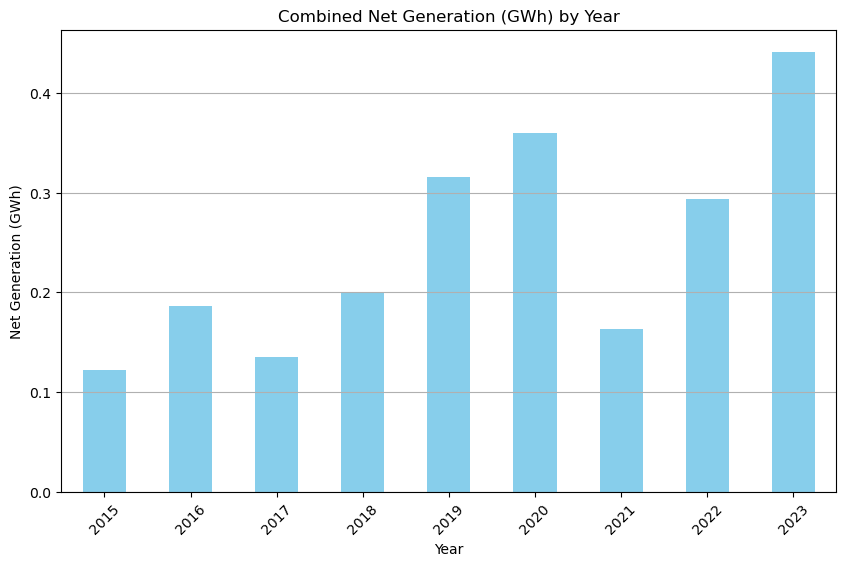

In [132]:
import matplotlib.pyplot as plt

# Group the data by report_year and sum the net_generation_mwh
generation_by_year = microsoft_df.groupby('report_year')['net_generation_mwh'].sum()


# Divide the y-axis values by 1e6 to convert MWh to GWh
generation_by_year = generation_by_year / 1e6

# Plot the data again with updated y-axis values
plt.figure(figsize=(10, 6))
generation_by_year.plot(kind='bar', color='skyblue')

plt.title('Combined Net Generation (GWh) by Year')
plt.xlabel('Year')
plt.ylabel('Net Generation (GWh)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [133]:
# Read the CSV file into a DataFrame
total_us_interest_df = pd.read_csv('total_us_interest.csv')

# Display the first few rows of the DataFrame
total_us_interest_df.head()

,Day,Trend_Score
0,11/17/2019,0
1,11/24/2019,0
2,12/1/2019,0
3,12/8/2019,0
4,12/15/2019,0


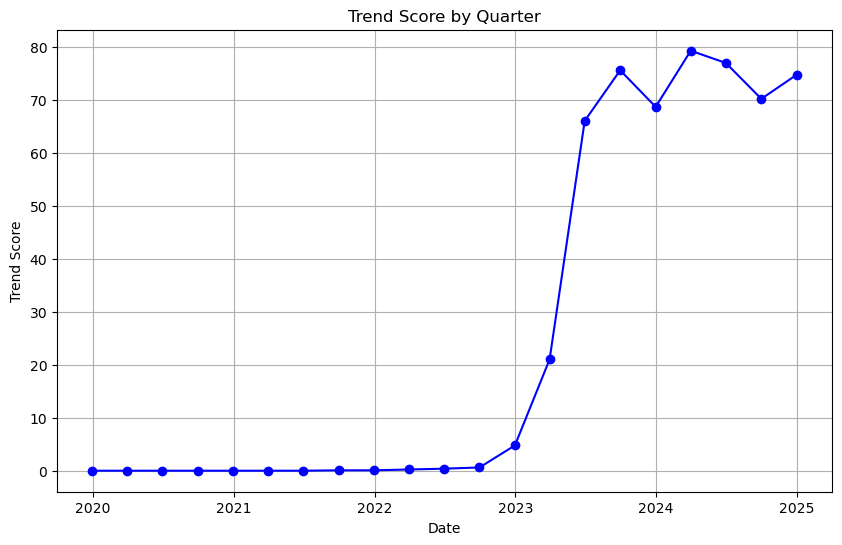

In [134]:
import matplotlib.pyplot as plt

# Convert the 'Day' column to datetime format
total_us_interest_df['Day'] = pd.to_datetime(total_us_interest_df['Day'])

# Set the 'Day' column as the index
total_us_interest_df.set_index('Day', inplace=True)

# Resample the data to show only each quarter
quarterly_df = total_us_interest_df.resample('Q').mean()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(quarterly_df.index, quarterly_df['Trend_Score'], marker='o', linestyle='-', color='b')

plt.title('Trend Score by Quarter')
plt.xlabel('Date')
plt.ylabel('Trend Score')
plt.grid(True)
plt.show()

In [135]:
print("Trend Data Index:", annual_trend_df.index)
print("Generation Data Index:", generation_by_year.index)


Trend Data Index: Index([2019, 2020, 2021, 2022, 2023], dtype='int32')
Generation Data Index: Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64', name='report_year')


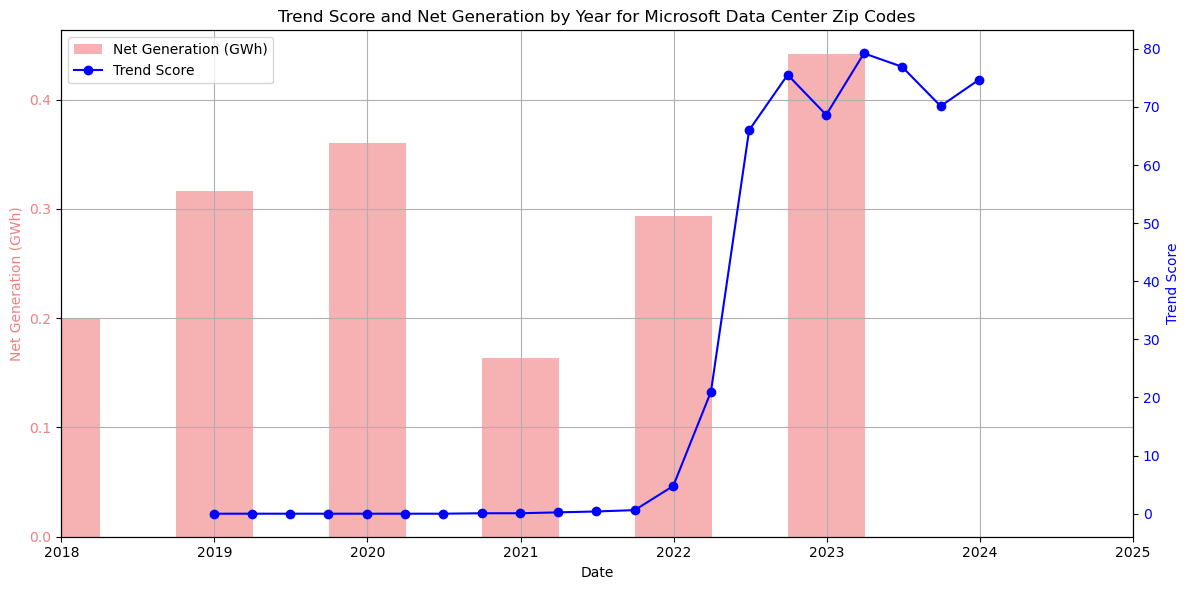

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure generation_by_year index is in datetime format
generation_by_year.index = pd.to_datetime(generation_by_year.index, format='%Y')

# Shift the trend line a year left
#quarterly_df.index = quarterly_df.index - pd.DateOffset(years=1)

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Net Generation on the primary y-axis (yearly resolution) with half-year wide bars
ax1.bar(generation_by_year.index, generation_by_year.values, color='lightcoral', alpha=0.6, label='Net Generation (GWh)', width=182.5)  # 182.5 days is approximately half a year
ax1.set_xlabel('Date')
ax1.set_ylabel('Net Generation (GWh)', color='lightcoral')
ax1.tick_params(axis='y', labelcolor='lightcoral')
ax1.grid(True)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot Trend Score on the secondary y-axis (keep original resolution)
ax2.plot(quarterly_df.index, quarterly_df['Trend_Score'], marker='o', linestyle='-', color='b', label='Trend Score')
ax2.set_ylabel('Trend Score', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add titles and legends
plt.title('Trend Score and Net Generation by Year for Microsoft Data Center Zip Codes')
fig.tight_layout()

# Add legends for clarity
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='upper left')

# Set the x-axis limits to show data from 2020 to 2025
ax1.set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2025-01-01'))

# Show the combined plot
plt.show()
